## Innomatics Data Science internship Hackathon

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [131]:
dataframe = pd.read_csv('dataframe_.csv')

In [132]:
dataframe.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [133]:
print(dataframe.describe())
print(dataframe.shape)

             input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495
(1697, 2)


In [134]:
# Check For null Value
dataframe.isnull().sum()
dataframe = dataframe.dropna()

# Check for null value again
dataframe.isnull().sum()


input     0
output    0
dtype: int64

* There's one null column in the dataframe which we can drop without affecting our dataframe

* Plot a scatter plot of the input and the column

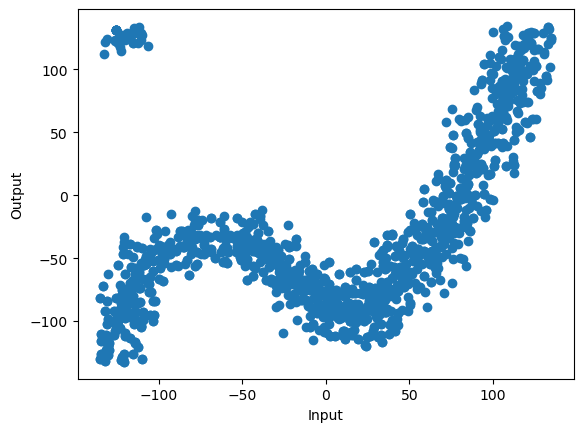

In [135]:
plt.scatter(dataframe["input"], dataframe["output"])
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

* Base on the above scatter plot in the data set its obvious that there are two major insights 
1. There's a linear relationship between the input and the output
2. There are few numbers of outliers in the dataset that seems to form a cluster in the north west corner of the scatterplot

In [136]:
# Ouliers are point where the input is less than -50 and output is greater than 100

dataframe_with_outliers = dataframe[(dataframe.input < -50) & (dataframe.output > 100)]
dataframe_no_outliers_index=(dataframe_with_outliers.index)
dataframe_no_outliers = dataframe.drop(dataframe_no_outliers_index)

* Base on the Histogram the data is well spread

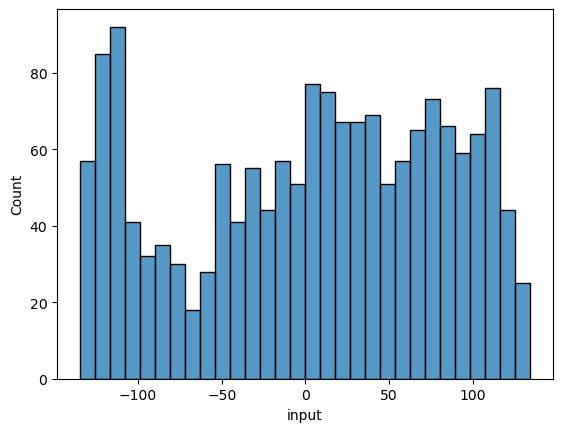

In [170]:
sns.histplot(dataframe_no_outliers.input,bins=30)
plt.show()



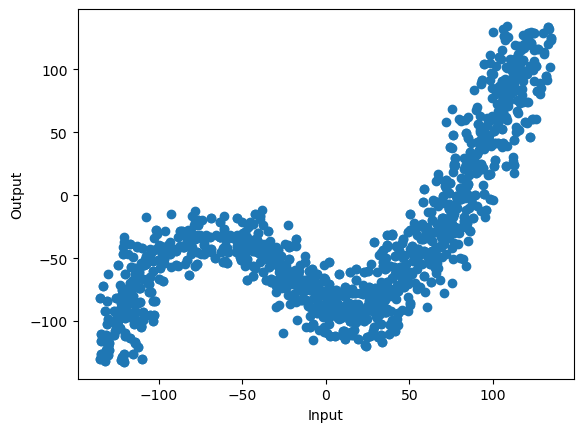

In [137]:
plt.scatter(dataframe_no_outliers["input"], dataframe_no_outliers["output"])
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

* After the outliers has been drop the above image is the result of the scatterplot between the input and the output

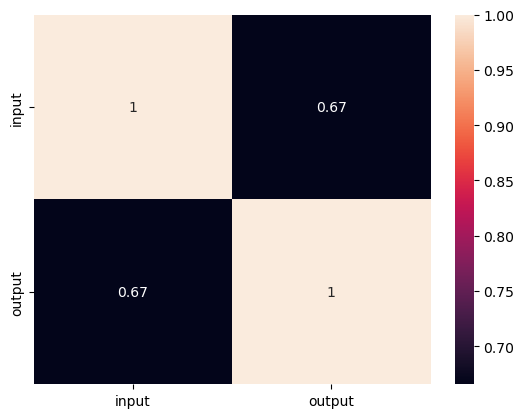

In [138]:
sns.heatmap(dataframe_no_outliers.corr(),annot=True)
plt.show()

* The above heatmap show that a positive correlation of 0.67 is between the input and the output variable

In [139]:
#Create a new feature of the diffrence between the input and the output

dataframe_no_outliers['absolute_diffrence'] = abs(dataframe_no_outliers.output - dataframe_no_outliers.input)

In [156]:
dataframe_no_outliers['absdifference_of_input_and_mean_value'] =  abs(dataframe_no_outliers.input - np.mean(dataframe_no_outliers.input))

                                          input    output  absolute_diffrence  \
input                                  1.000000  0.665554            0.316707   
output                                 0.665554  1.000000           -0.368533   
absolute_diffrence                     0.316707 -0.368533            1.000000   
absdifference_of_input_and_mean_value -0.178113  0.405953           -0.550597   

                                       absdifference_of_input_and_mean_value  
input                                                              -0.178113  
output                                                              0.405953  
absolute_diffrence                                                 -0.550597  
absdifference_of_input_and_mean_value                               1.000000  


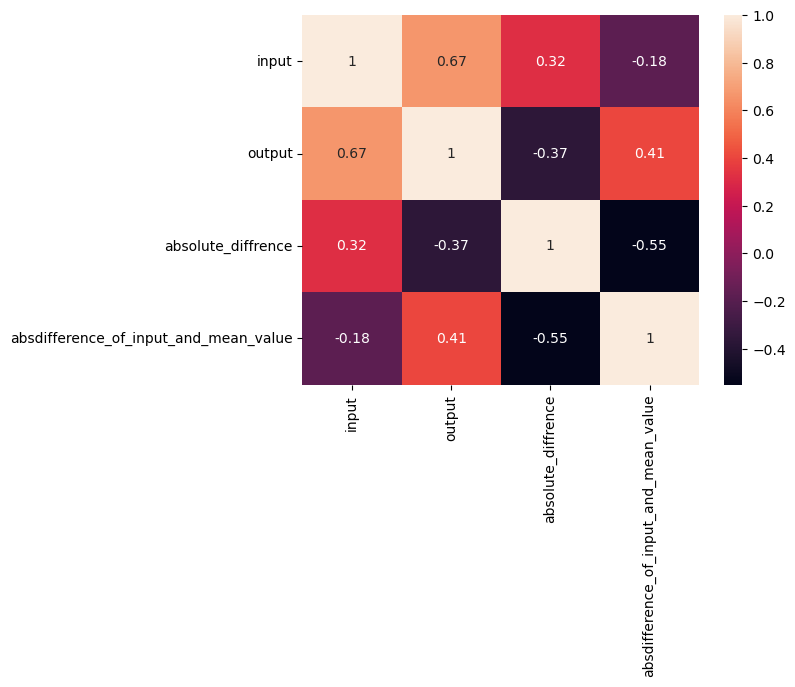

In [165]:
print(dataframe_no_outliers.corr())
sns.heatmap(dataframe_no_outliers.corr(),annot=True)
plt.show()

In [141]:
print(dataframe_no_outliers.describe())
print(dataframe_no_outliers.shape)

             input       output  absolute_diffrence
count  1657.000000  1657.000000         1657.000000
mean      4.026504   -37.848459           60.885799
std      77.655526    61.739562           38.800990
min    -134.962839  -132.422167            0.047956
25%     -58.376065   -81.000000           26.569865
50%      12.623779   -51.665133           56.366669
75%      71.018883   -17.584021           93.516610
max     134.605775   134.425495          149.940045
(1657, 3)


* There is a correlation of about 0.31 and -0.36 between the absolute difference and the input ,output feature respectively
* And also There's a correlation of about 0.41 between the new feature absolute diifference of mean and input with the output variable

# Linear Regression Model

In [142]:
x = np.array(dataframe_no_outliers['input']).reshape(-1,1)
y= dataframe_no_outliers.output

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [145]:
model1 = LinearRegression()

model1.fit(x_train,y_train)

LinearRegression()

In [146]:
predictions1 = model1.predict(x_test)

In [147]:
def evaluate_model_regression(predictions,y_test):
    rmse = np.sqrt(mean_squared_error(predictions,y_test))
    print("Root Mean squared error is = ",rmse)

    r2 = r2_score(predictions,y_test)
    print("R_Squared = ", r2)

    mae = mean_absolute_error(predictions,y_test)
    print("Mean absolute error is = ",mae)

In [148]:
evaluate_linear_regression(predictions1,y_test)

Mean squared error is =  1958.0385971871465
Root Mean squared error is =  44.2497299108949
R_Squared =  -0.21790595711695993
Mean absolute error is =  37.33932954913315


* Create another model using the new features

In [161]:
x2 = np.array(dataframe_no_outliers[['input','absolute_diffrence','absdifference_of_input_and_mean_value']])
y2= dataframe_no_outliers.output

x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=1)

model2 = LinearRegression()

In [162]:
model2.fit(x_train2,y_train2)

predictions2=model2.predict(x_test2)

evaluate_linear_regression(predictions2,y_test2)

Mean squared error is =  428.05040265780735
Root Mean squared error is =  20.689378981927113
R_Squared =  0.8538022100893016
Mean absolute error is =  12.658195711109345


# Model Result
* Base on the two Linear Regression models above the first model that was build with the input and the output column alone perform badly with the following results

Mean squared error is =  1958.0385971871465

Root Mean squared error is =  44.2497299108949

R_Squared =  -0.21790595711695993

Mean absolute error is =  37.33932954913315


* It return a very high Mean squared error and a negative r score

* But the Other one build with an additional feature of the difference between the input and output column return a better result 

Mean squared error is =  608.3134089621415

Root Mean squared error is =  24.66401039900327

R_Squared =  0.7700679574539439

Mean absolute error is =  18.817854532852493

* it returns a R score of about 0.77 close to 1 and a lower meansquared error


# Other Models 

In [163]:
models = [DecisionTreeRegressor(),RandomForestRegressor()]
model_names = ['Decision Tree Regressor','Random Forest Regressor']


for model,model_name in zip(models,model_names):
    
    print('{} with single feature'.format(model_name))
    print('..............................')
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    
    evaluate_model_regression(prediction,y_test)
    print('.....................................................................................')
    
    print('{} with Multiple feature'.format(model_name))
    print('..............................')
    model2.fit(x_train2,y_train2)
    prediction = model2.predict(x_test2)
    
    evaluate_model_regression(prediction,y_test2)
    
    print('.....')
    print('.....')
    print('.....')
    print('.....')
    

Decision Tree Regressor with single feature
..............................
Root Mean squared error is =  18.39293701145687
R_Squared =  0.8926525699472878
Mean absolute error is =  9.614398933565978
.....................................................................................
Decision Tree Regressor with Multiple feature
..............................
Root Mean squared error is =  20.689378981927113
R_Squared =  0.8538022100893016
Mean absolute error is =  12.658195711109345
.....
.....
.....
.....
Random Forest Regressor with single feature
..............................
Root Mean squared error is =  18.649592007664598
R_Squared =  0.8865921082287977
Mean absolute error is =  12.786743642214262
.....................................................................................
Random Forest Regressor with Multiple feature
..............................
Root Mean squared error is =  20.689378981927113
R_Squared =  0.8538022100893016
Mean absolute error is =  12.65819571110934

* Both the Random Forest and The Decision tree regressor do well on both the single predictor and mulltiple predictor

Decision Tree Regressor with single feature
..............................

Root Mean squared error is =  18.39293701145687

R_Squared =  0.8926525699472878

Mean absolute error is =  9.614398933565978

.....................................................................................
Decision Tree Regressor with Multiple feature
..............................
Root Mean squared error is =  20.689378981927113

R_Squared =  0.8538022100893016

Mean absolute error is =  12.658195711109345

.....
.....
.....
.....
Random Forest Regressor with single feature
..............................

Root Mean squared error is =  18.649592007664598

R_Squared =  0.8865921082287977

Mean absolute error is =  12.786743642214262

.....................................................................................
Random Forest Regressor with Multiple feature
..............................

Root Mean squared error is =  20.689378981927113

R_Squared =  0.8538022100893016

Mean absolute error is =  12.658195711109345

.....
.....
.....
.....